# Bottom Layer 2 - Axial - Module 1
---
Classified as "Perfect" during 2014 assembly

### Data 
Events: 2000
Bias: 180 V

In [1]:
from notebook_utils import *

# Create ROOT canvas
canvas = r.TCanvas()
canvas.SetLogy(0)
canvas.SetLogx(0)

Welcome to JupyROOT 6.12/06


In [2]:
ntuple = rnp.root2array('20190415_module1_axial_b180v.root', 'SVT_QA')

In [3]:
events = np.unique(ntuple["event"])
pchannels = np.unique(ntuple['pchannel'])

hists = collections.OrderedDict()
samples = {}
for channel in pchannels: 
    samples["Channel %s - Sample 0" % channel] = ntuple['sample0'][ntuple['pchannel'] == channel]
    samples["Channel %s - Sample 1" % channel] = ntuple['sample1'][ntuple['pchannel'] == channel]
    samples["Channel %s - Sample 2" % channel] = ntuple['sample2'][ntuple['pchannel'] == channel]
    samples["Channel %s - Sample 3" % channel] = ntuple['sample3'][ntuple['pchannel'] == channel]
    samples["Channel %s - Sample 4" % channel] = ntuple['sample4'][ntuple['pchannel'] == channel]
    samples["Channel %s - Sample 5" % channel] = ntuple['sample5'][ntuple['pchannel'] == channel]

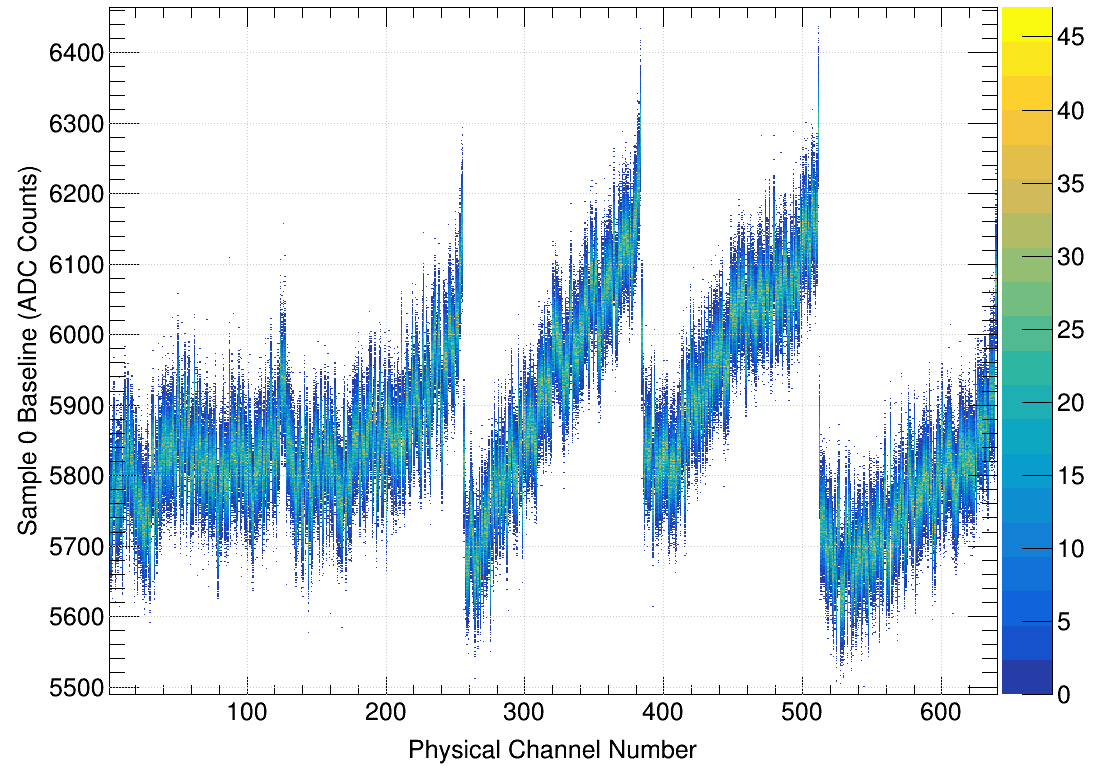

In [4]:
hist = draw_hist2D(ntuple['pchannel'], ntuple['sample0'], 640, 0, 640, 16384, 0, 16384, []) 

hist.Draw("colz")
hist.GetXaxis().SetTitle('Physical Channel Number')
hist.GetYaxis().SetTitle('Sample 0 Baseline (ADC Counts)')

canvas.Draw()

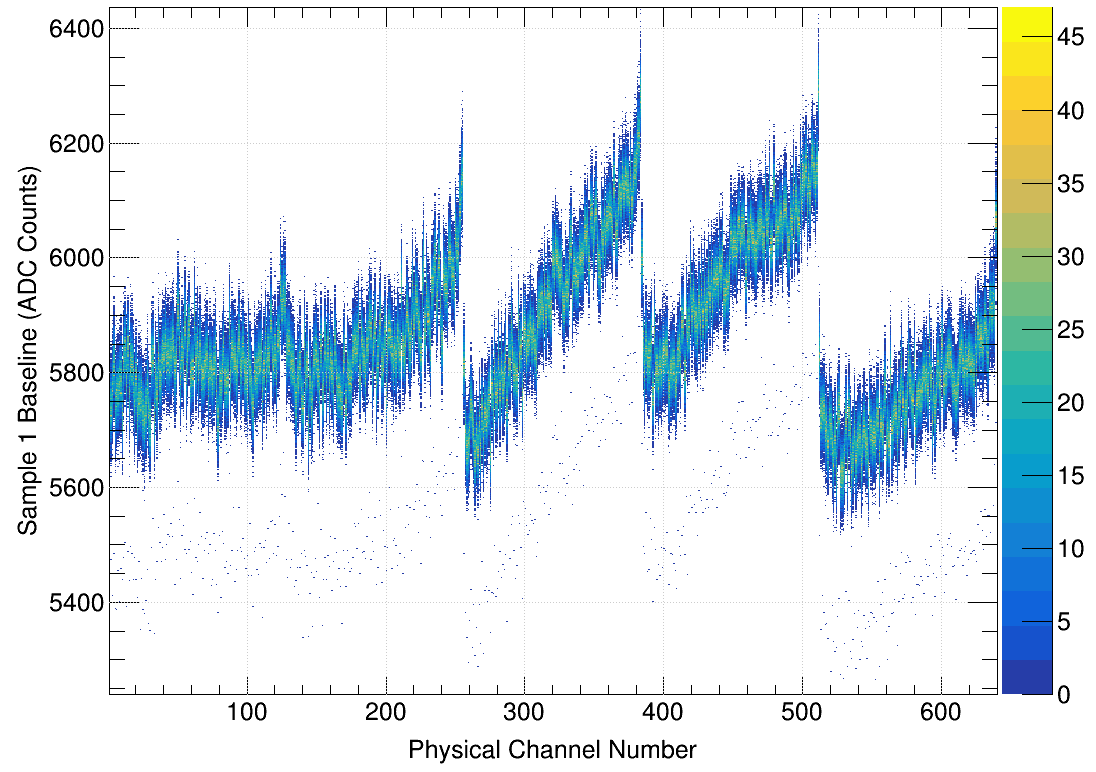

In [5]:
hist = draw_hist2D(ntuple['pchannel'], ntuple['sample1'], 640, 0, 640, 16384, 0, 16384, []) 

hist.Draw("colz")
hist.GetXaxis().SetTitle('Physical Channel Number')
hist.GetYaxis().SetTitle('Sample 1 Baseline (ADC Counts)')

canvas.Draw()

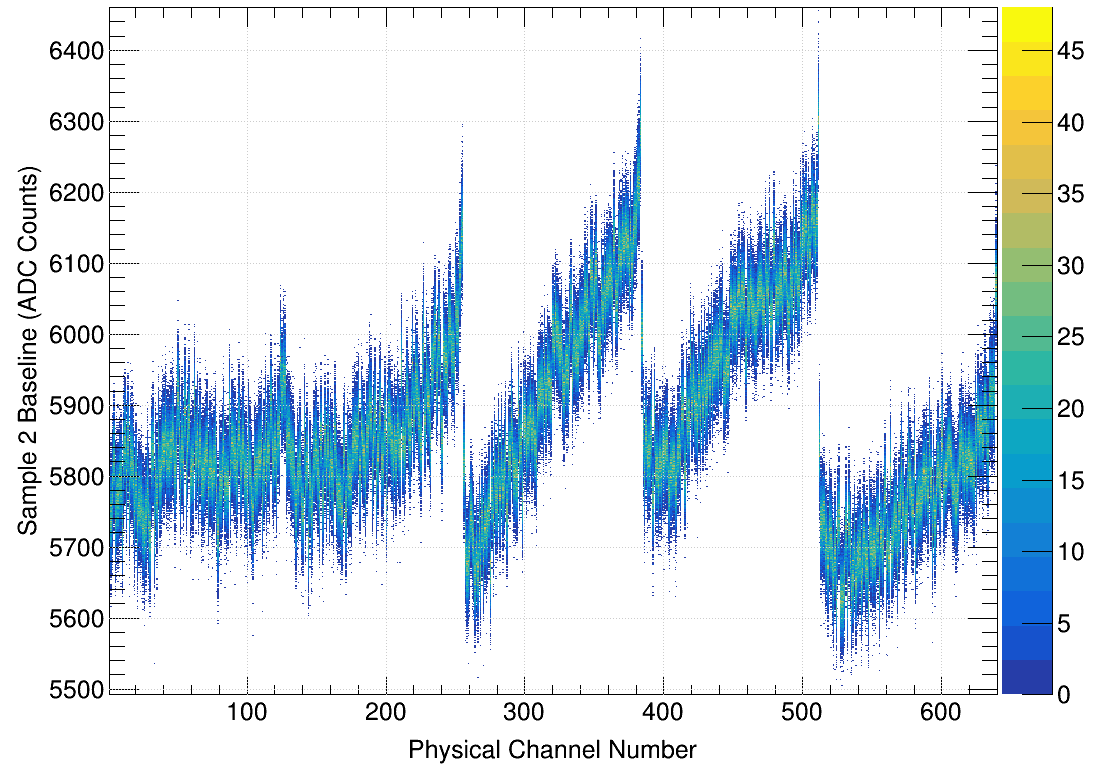

In [6]:
hist = draw_hist2D(ntuple['pchannel'], ntuple['sample2'], 640, 0, 640, 16384, 0, 16384, []) 

hist.Draw("colz")
hist.GetXaxis().SetTitle('Physical Channel Number')
hist.GetYaxis().SetTitle('Sample 2 Baseline (ADC Counts)')

canvas.Draw()

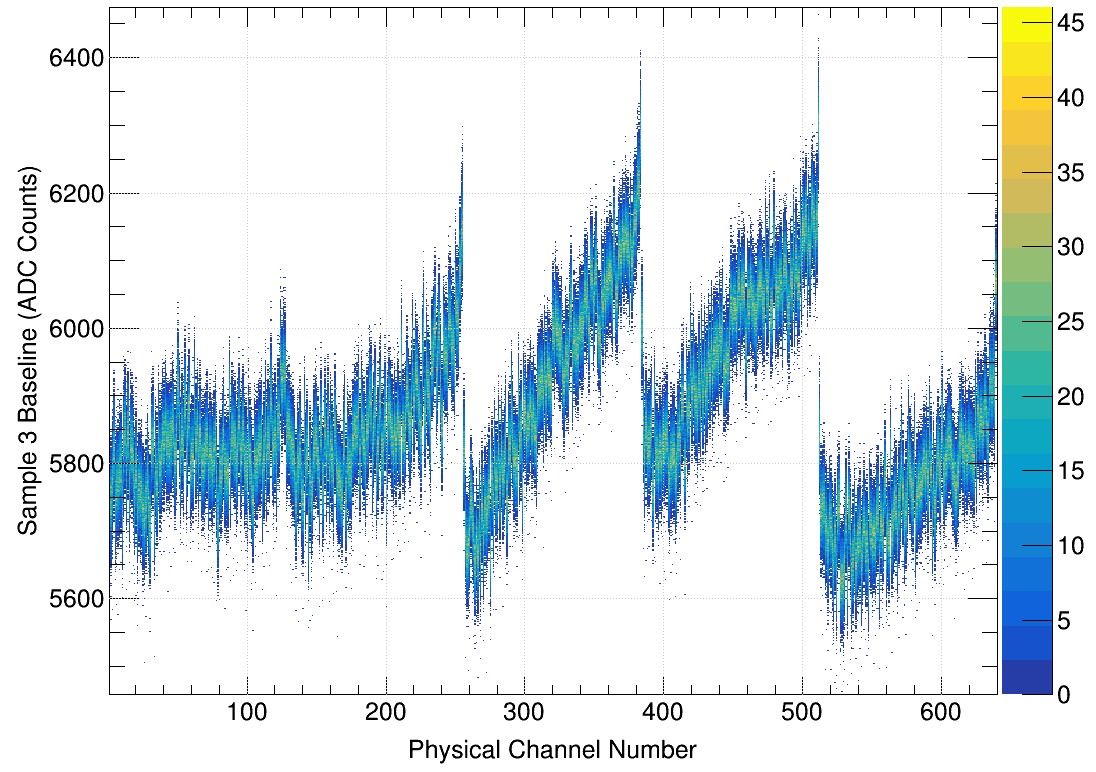

In [7]:
hist = draw_hist2D(ntuple['pchannel'], ntuple['sample3'], 640, 0, 640, 16384, 0, 16384, []) 

hist.Draw("colz")
hist.GetXaxis().SetTitle('Physical Channel Number')
hist.GetYaxis().SetTitle('Sample 3 Baseline (ADC Counts)')

canvas.Draw()

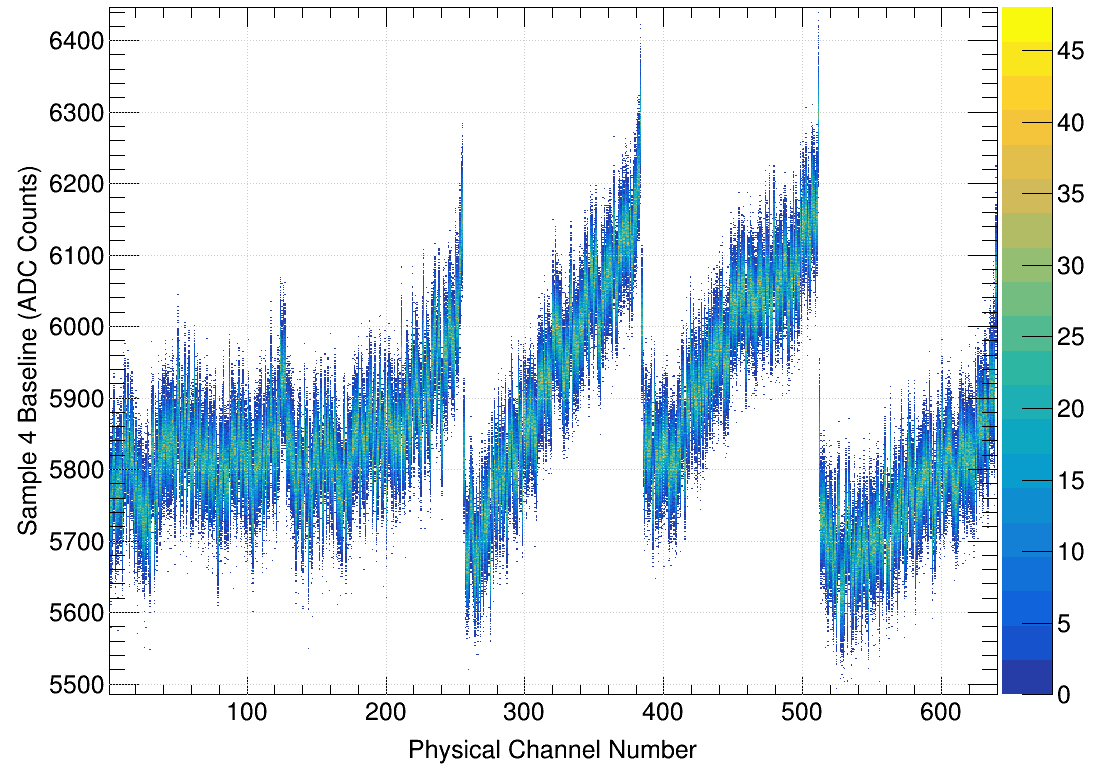

In [8]:
hist = draw_hist2D(ntuple['pchannel'], ntuple['sample4'], 640, 0, 640, 16384, 0, 16384, []) 

hist.Draw("colz")
hist.GetXaxis().SetTitle('Physical Channel Number')
hist.GetYaxis().SetTitle('Sample 4 Baseline (ADC Counts)')

canvas.Draw()

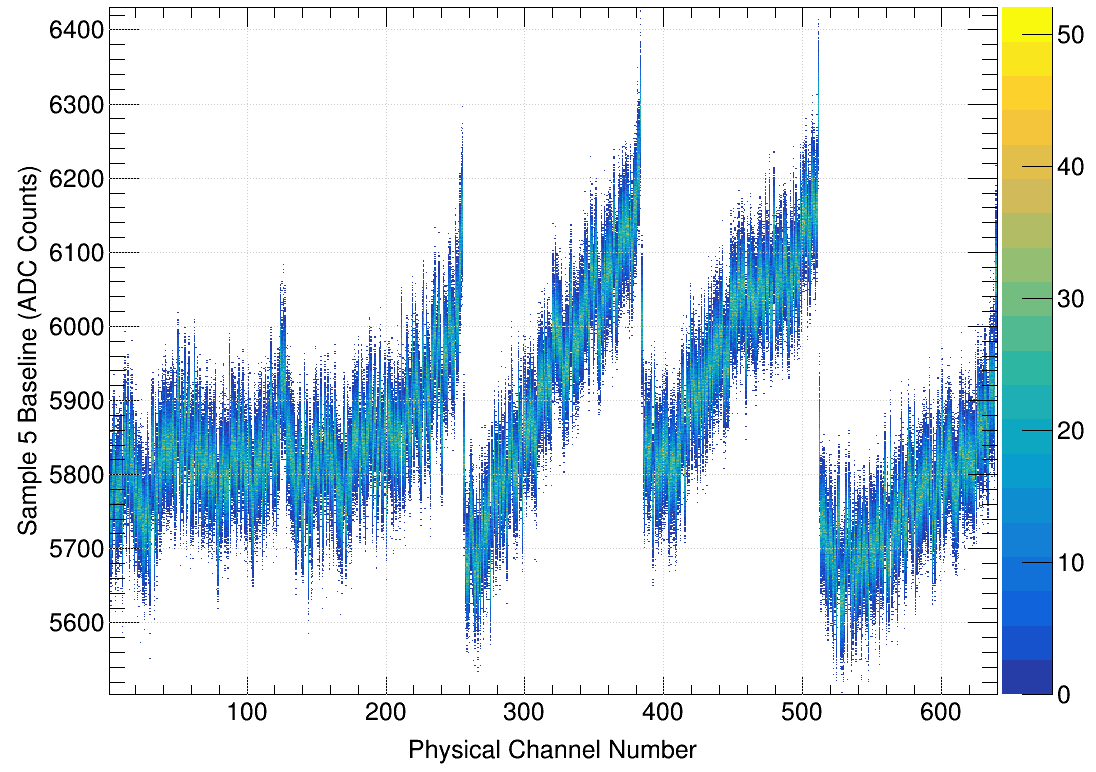

In [9]:
hist = draw_hist2D(ntuple['pchannel'], ntuple['sample5'], 640, 0, 640, 16384, 0, 16384, []) 

hist.Draw("colz")
hist.GetXaxis().SetTitle('Physical Channel Number')
hist.GetYaxis().SetTitle('Sample 5 Baseline (ADC Counts)')

canvas.Draw()

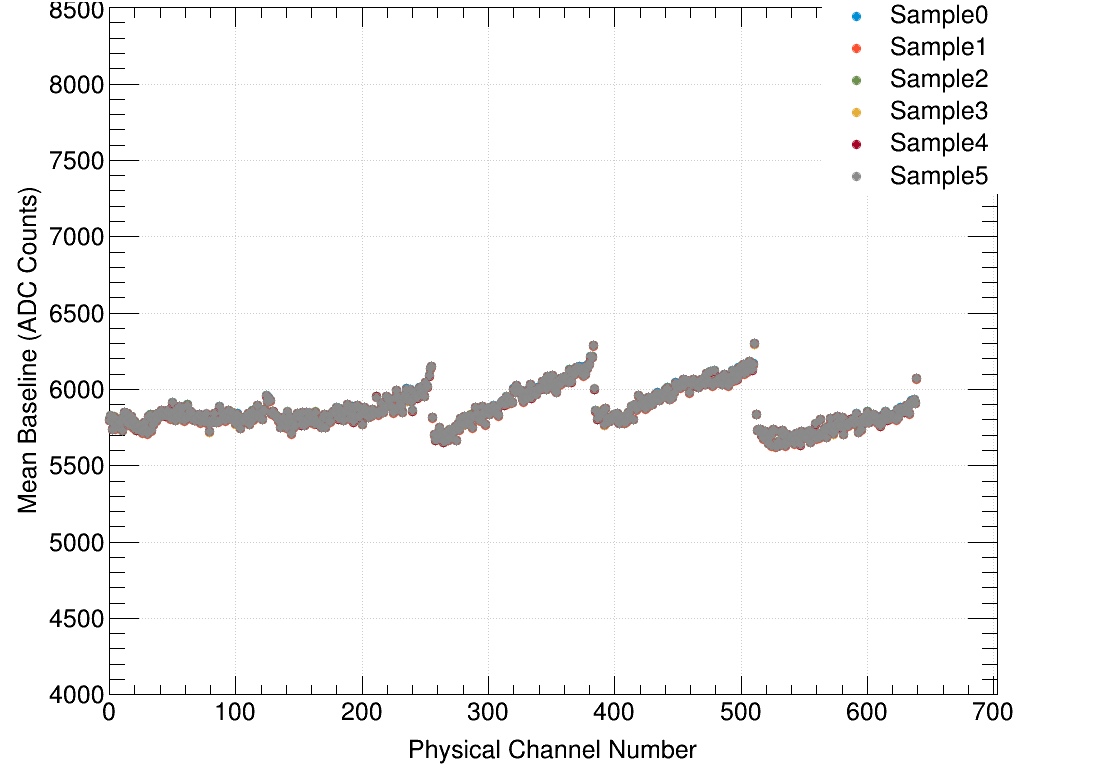

In [10]:
gmeans = collections.OrderedDict([
    ("Sample0",r.TGraphErrors(len(pchannels))), 
    ("Sample1",r.TGraphErrors(len(pchannels))), 
    ("Sample2",r.TGraphErrors(len(pchannels))),
    ("Sample3",r.TGraphErrors(len(pchannels))),
    ("Sample4",r.TGraphErrors(len(pchannels))),
    ("Sample5",r.TGraphErrors(len(pchannels))) 
])

legend = r.TLegend(0.75, .75, 1.0, 1.0)
legend.SetLineColor(r.kWhite)

for channel in pchannels : 
    for i, graph in enumerate(gmeans.values()):
        mean = np.mean(samples["Channel %s - Sample %s" % (channel, i)])
        graph.SetPoint(int(channel), channel, mean)
        graph.SetMarkerColor(rcolors[i].GetNumber())
        graph.SetMarkerStyle(20)
        graph.SetMarkerSize(1)
        graph.GetXaxis().SetTitle('Physical Channel Number')
        graph.GetXaxis().CenterTitle()
        graph.GetYaxis().SetTitle('Mean Baseline (ADC Counts)')
        graph.GetYaxis().CenterTitle()
        graph.GetYaxis().SetRangeUser(4000, 8500)
        

gmeans["Sample0"].Draw("ap")
for sample in gmeans:
    gmeans[sample].Draw("same p")
    legend.AddEntry(gmeans[sample], sample, 'p')

legend.Draw()
canvas.Draw()

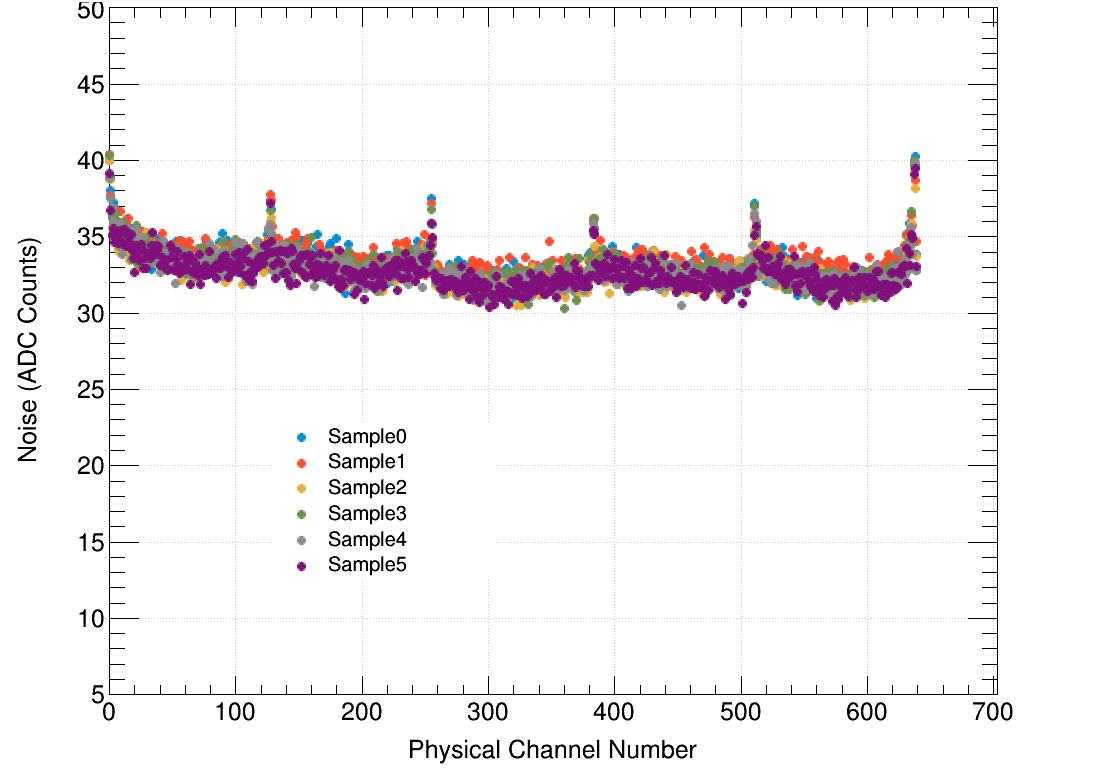

In [11]:
gnoise = collections.OrderedDict([
          ("Sample0",Graph(len(pchannels))),
          ("Sample1",Graph(len(pchannels))),
          ("Sample2",Graph(len(pchannels))),
          ("Sample3",Graph(len(pchannels))),
          ("Sample4",Graph(len(pchannels))),
          ("Sample5",Graph(len(pchannels))) 
])

legend = r.TLegend(0.25, .25, 0.45, 0.45)
legend.SetLineColor(r.kWhite)

for channel in pchannels: 
    for i, graph in enumerate(gnoise.values()):
        sigma = np.std(samples["Channel %s - Sample %s" % (channel, i)])
        graph.SetPoint(int(channel), channel, sigma)
        graph.markerstyle = 20
        graph.markersize = 1
        graph.xaxis.SetTitle("Physical Channel Number")
        graph.xaxis.CenterTitle()
        graph.yaxis.SetTitle("Noise (ADC Counts)")
        graph.yaxis.CenterTitle()
        graph.yaxis.SetRangeUser(5, 50)
        graph.color = colors[i]
        
gnoise['Sample0'].Draw('ap')
legend.AddEntry(gnoise['Sample0'], 'Sample0', 'p')
for sample in gnoise:
    if sample == 'Sample0': continue
    legend.AddEntry(gnoise[sample], sample, 'p')
    gnoise[sample].Draw('p same')

legend.Draw()

canvas.Draw()